In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

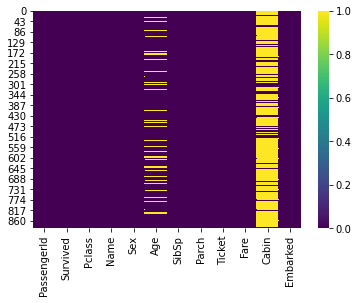

In [4]:
sns.heatmap(train.isnull(),cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

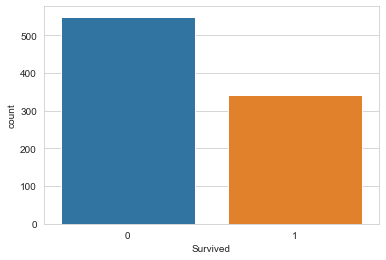

In [5]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

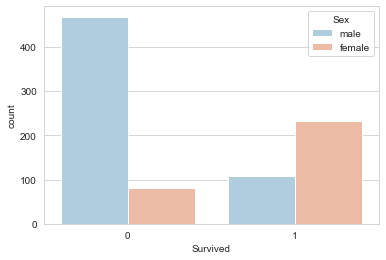

In [6]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',hue='Sex',palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

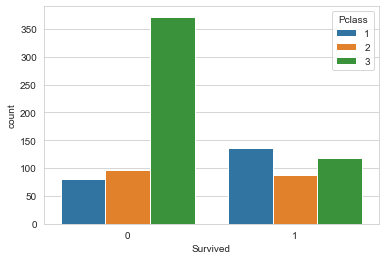

In [7]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',hue='Pclass')

<AxesSubplot:xlabel='Age', ylabel='Count'>

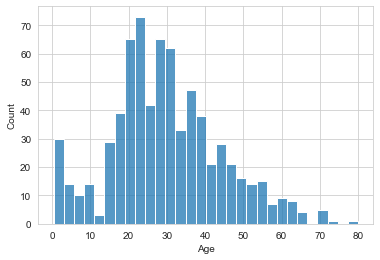

In [8]:
sns.histplot(train['Age'].dropna(),bins=30)

<AxesSubplot:ylabel='Frequency'>

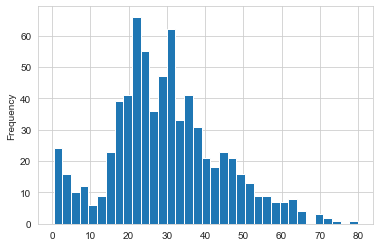

In [24]:
train['Age'].plot.hist(bins=35)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

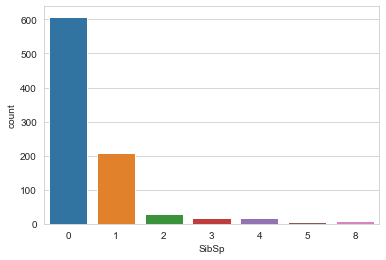

In [26]:
sns.countplot(data=train,x='SibSp')

<AxesSubplot:>

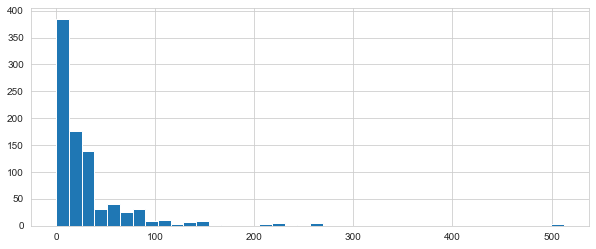

In [32]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [33]:
import cufflinks as cf
cf.go_offline()

In [35]:
#train['Fare'].iplot(kind='hist',bins=30)

In [38]:
train['Age'].mean()

29.69911764705882

In [9]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

<AxesSubplot:>

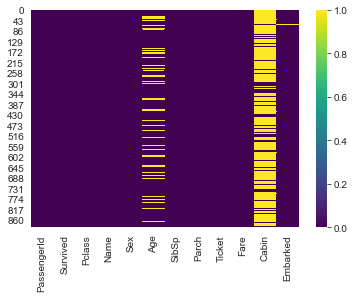

In [10]:
sns.heatmap(train.isnull(),cmap='viridis')

In [42]:
import cufflinks as cf
cf.go_offline()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

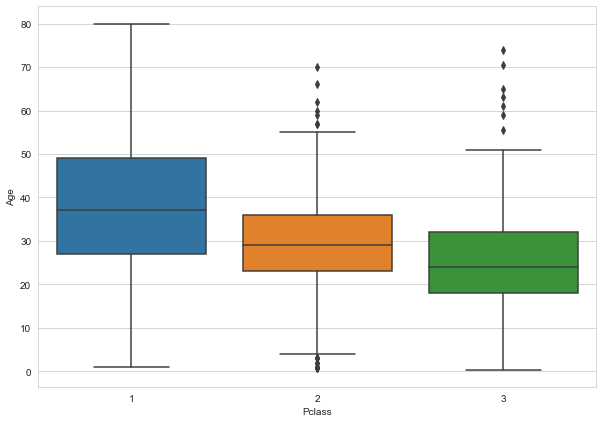

In [11]:
plt.figure(figsize=(10,7))
sns.boxplot(data=train,x='Pclass',y='Age')

In [12]:
def change_val(x):
    Age=x[0]
    Pclass=x[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 38.233
            
        elif Pclass==2:
            return 29.878
            
        else:
            return 25.141
            
    else:
        return Age

In [13]:
train['Age']=train[['Age','Pclass']].apply(change_val,axis=1)

<AxesSubplot:>

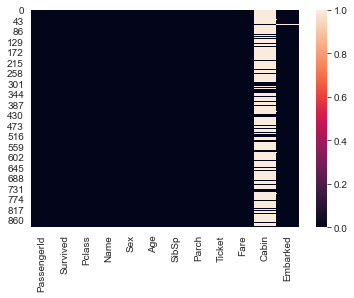

In [14]:
sns.heatmap(train.isnull())

In [15]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

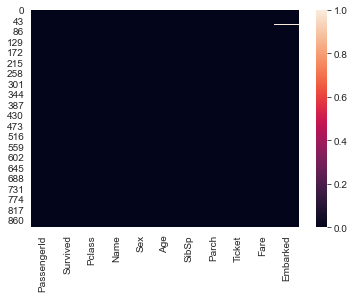

In [16]:
sns.heatmap(train.isnull())

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
train.dropna(inplace=True)

<AxesSubplot:>

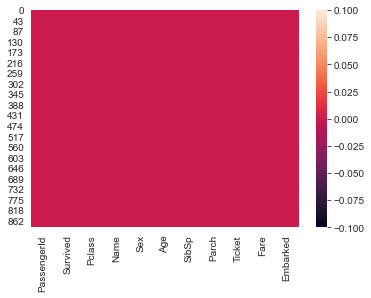

In [19]:
sns.heatmap(train.isnull())

In [20]:
sex= pd.get_dummies(train['Sex'],drop_first=True)

In [21]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [25]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [27]:
train=pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [28]:
train.drop(['PassengerId'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [29]:
train.drop(['Fare'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S,male,Q,S
0,0,3,22.0,1,0,1,0,1,1,0,1
1,1,1,38.0,1,0,0,0,0,0,0,0
2,1,3,26.0,0,0,0,0,1,0,0,1
3,1,1,35.0,1,0,0,0,1,0,0,1
4,0,3,35.0,0,0,1,0,1,1,0,1


In [30]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [33]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [34]:
X.head()

,Pclass,Age,SibSp,Parch,male,Q,S,male,Q,S
0,3,22.0,1,0,1,0,1,1,0,1
1,1,38.0,1,0,0,0,0,0,0,0
2,3,26.0,0,0,0,0,1,0,0,1
3,1,35.0,1,0,0,0,1,0,0,1
4,3,35.0,0,0,1,0,1,1,0,1


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel=LogisticRegression()

In [39]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [40]:
predictions=logmodel.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test,predictions)

array([[149,  14],
       [ 31,  73]], dtype=int64)